In [1]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter
from konlpy.tag import Okt
from PIL import Image
import mecab

In [2]:
import numpy as np
import pandas as pd
import json
from bs4 import BeautifulSoup
import requests
import random
import time
#-------------------- 주피터 , 출력결과 넓이 늘리기 ---------------
# from IPython.core.display import display, HTML
from IPython.display import display, HTML

display(HTML("<style>.container{width:100% !important;}</style>"))
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
pd.set_option('max_colwidth', None)

import warnings
warnings.filterwarnings(action='ignore')

# 데잍터 로드

In [3]:
df = pd.read_csv('../data/newsdf_samsung_seoul.csv')
# df.info()

In [4]:
len(df)

155413

In [5]:
df.head(2)

,key_rdate,key_title,label
0,2016-04-10 11:22:00,"이용섭·양향자 후보,“안철수 대표에 1:1 또는 2:2 공개토론 제안”",0
1,2017-01-11 17:02:00,"특검 ""최순실 국정교과서에도 개입""…태블릿 잠금 패턴은 모두 'L'",0


In [6]:
df = df[df['label'] != 0]

In [7]:
len(df)

70847

# 토크나이저

In [8]:
mecab = mecab.MeCab()

In [9]:
df['tokenized'] = df['key_title'].apply(mecab.morphs)

In [10]:
df.head(2)

,key_rdate,key_title,label,tokenized
6,2020-01-01 17:22:00,삼성전자·SK하이닉스 '첫손'...소부장에도 러브콜,1,"[삼성전자, ·, SK, 하이닉스, ', 첫손, '..., 소, 부장, 에, 도, 러브, 콜]"
8,2020-01-01 17:24:00,"""10억 밑으로 낮추자""...임원들 연말 자사주 대거 팔아",1,"["", 10, 억, 밑, 으로, 낮추, 자, ""..., 임원, 들, 연말, 자, 사주, 대거, 팔, 아]"


In [11]:
df1= df[df['label']==1]
df2= df[df['label']==2]

In [12]:
from collections import Counter

vocab_counter1 = Counter()
for sentence in df1['tokenized']:
    vocab_counter1.update(sentence)
    
# print(vocab_counter[:2])

In [13]:
from collections import Counter

vocab_counter2 = Counter()
for sentence in df2['tokenized']:
    vocab_counter2.update(sentence)
    
# print(vocab_counter[:2])

# stopword

## df1(긍정) -stopword

In [14]:
dellist1 = [',',']','[','.',"'",'…','에','(',')','"','SEN','·','%','+','3','1','2','특징', '억', '가', '원', '만','4','‘', '로', '도','“', '..'
           , '는', '’', '”','%,','5', '이', '-','0', '조','한','대', '반','일', '어','다', '적', '월', '6','코로나','년' ,'등'  ]

In [15]:
import operator
# vocab_counter1 = sorted(vocab_counter1.items(), key=operator.itemgetter(1), reverse=True)
# value로 정렬

In [16]:
# vocab_counter = sorted(vocab_counter.items())
# 키로 정렬

In [17]:
# vocab_counter1

In [18]:
# a = ['a','b','c','d','e','f']

In [19]:
# del a[1]

In [20]:
# a

In [22]:
len(vocab_counter1), len(dellist1)

(19644, 49)

In [23]:
# vocab_counter.keys()

In [24]:
# b = range(len(vocab_counter))
# np.max(b)

In [25]:
# vocab_counter.keys()

In [26]:
for word in list(vocab_counter1.keys()):
    # print(word)
    # print(i, vocab_counter[i][0])
    if word in dellist1:
        del vocab_counter1[word]


In [27]:
# vocab_counter[0][0]

In [28]:
len(vocab_counter1)

19595

## df1(긍정) -빈도수 조절

In [29]:
# 숫자조정 : '코스피',주

In [30]:
vocab_counter1['코스피'] = round(vocab_counter1['코스피']*1/2)

In [31]:
vocab_counter1['주'] = round(vocab_counter1['주']*1/2)

## df2(부정) -stopword

In [32]:
delllist2=[',',']', '[', '.', '…',"'", '에','·', '1', '(', '하락','마감',')', '%', '"','선','주','억', '2','기관', '시황','3', '만','..', '종목'
            '도', '는','SEN','20', '분기','0','이상','가','로','도','은','원','-','대','은','한','‘', '%)','다','“','일','종목','상위','특징','4','으로']

In [33]:
import operator
# vocab_counter2 = sorted(vocab_counter2.items(), key=operator.itemgetter(1), reverse=True)
# value로 정렬

In [ ]:
# vocab_counter2

In [35]:
for word in list(vocab_counter2.keys()):
    # print(word)
    # print(i, vocab_counter[i][0])
    if word in delllist2:
        del vocab_counter2[word]


## df2(부정) - 빈도수 조절

In [36]:
# 코스피,

In [37]:
vocab_counter2['코스피'] = round(vocab_counter2['코스피']*1/4)

# word cloud

## 긍정

In [38]:
# img = Image.open('책_검은배경.jpg')
# img_array = np.array(img)

# wc = WordCloud(font_path='malgun', width=400, height=400, scale=2.0, max_font_size=250, mask=img_array)
# gen = wc.generate_from_frequencies(c)

# plt.figure()
# plt.imshow(gen)

In [39]:
img = Image.open('./cloud1.png')
img_array = np.array(img)
# img

(-0.5, 2111.5, 1115.5, -0.5)

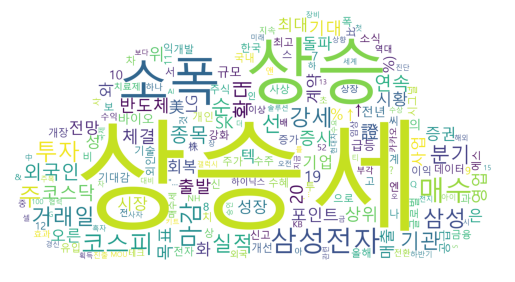

In [44]:
wc = WordCloud(font_path='malgun', width=400, height=400, scale=2.0, max_font_size=250,background_color='white',mask=img_array)
gen = wc.generate_from_frequencies(vocab_counter1)
plt.figure()
plt.imshow(gen)
plt.axis('off')

## 부정

(-0.5, 2111.5, 1115.5, -0.5)

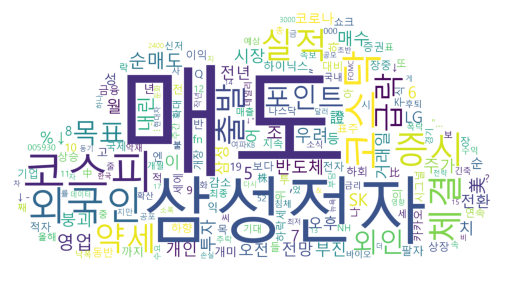

In [45]:
wc = WordCloud(font_path='malgun', width=400, height=400, scale=2.0, max_font_size=250,background_color='white',mask=img_array)
gen = wc.generate_from_frequencies(vocab_counter2)
plt.figure()
plt.imshow(gen)
plt.axis('off')